In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [80]:
df = pd.read_csv('SpotifyFeatures.csv')

In [81]:
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [82]:
features = ['danceability','energy','valence','tempo']
# valence, indicates the happiness or happy mood after listening to a music
spotify_df = df[features].dropna()

In [83]:
spotify_df = spotify_df.sample(n=1000, random_state=42)
# it is reducing the size of the dataset to the first 1000 columns

In [84]:
spotify_df['mood'] = spotify_df['valence'].apply(lambda x: 1 if x>=0.5 else 0)
# we are checking whether the mood is good or bad by using if-else construct
print("Dataset Shape:", spotify_df.shape)
print("Target Classes: 0 = sad, 1 = Happy")

Dataset Shape: (1000, 5)
Target Classes: 0 = sad, 1 = Happy


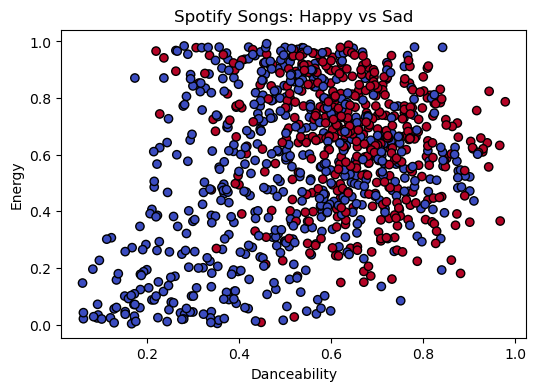

In [85]:
plt.figure(figsize=(6,4))
plt.scatter(spotify_df['danceability'],spotify_df['energy'],c=spotify_df['mood'],cmap='coolwarm',edgecolors='k')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Spotify Songs: Happy vs Sad')
plt.show()

In [86]:
X = spotify_df[features]
y = spotify_df['mood']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

In [87]:
scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
svm_clf = SVC(kernel='rbf', C=2, gamma='scale')
## the smaller the C, the simpler will be the curve. It is used for tuning the parameters so we can get the maxm benefit out of it
##use shift+tab to open the documentation of that standard/imported library
## test out with the mesh library
svm_clf.fit(X_train, y_train)

SVC(C=2)

In [89]:
accuracy = svm_clf.score(X_test,y_test)
print("\n SVM Model Accuracy:",accuracy)


 SVM Model Accuracy: 0.995
